# Get data for MA

In [2]:
#import packages
from datetime import datetime

import geopandas as gp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import descartes

from shapely.geometry import Point
# from adjustText import adjust_text

In [3]:
#sample code from https://github.com/teamookla/ookla-open-data/blob/master/tutorials/aggregate_by_county_py.ipynb
def quarter_start(year: int, q: int) -> datetime:
    if not 1 <= q <= 4:
        raise ValueError("Quarter must be within [1, 2, 3, 4]")

    month = [1, 4, 7, 10]
    return datetime(year, month[q - 1], 1)


def get_tile_url(service_type: str, year: int, q: int) -> str:
    dt = quarter_start(year, q)

    base_url = "https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance"
    url = f"{base_url}/type%3D{service_type}/year%3D{dt:%Y}/quarter%3D{q}/{dt:%Y-%m-%d}_performance_fixed_tiles.zip"
    return url

In [4]:
tile_url = get_tile_url("fixed", 2020, 1)
tile_url

'https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance/type%3Dfixed/year%3D2020/quarter%3D1/2020-01-01_performance_fixed_tiles.zip'

In [5]:
tiles = gp.read_file(tile_url)
tiles

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
0,3100121113233332,16599,13312,70,37,27,"POLYGON ((106.68823 -6.30984, 106.69373 -6.309..."
1,3112231300122103,42461,13516,19,171,53,"POLYGON ((145.04700 -37.82714, 145.05249 -37.8..."
2,0331102110022021,25765,15185,16,228,100,"POLYGON ((-9.13513 38.71123, -9.12964 38.71123..."
3,1202020213110310,79703,15579,18,199,32,"POLYGON ((1.35132 51.38550, 1.35681 51.38550, ..."
4,1231210133132220,27032,24622,23,174,55,"POLYGON ((75.84961 30.91165, 75.85510 30.91165..."
5,0231301222133033,166797,55407,18,38,10,"POLYGON ((-98.11340 29.71191, -98.10791 29.711..."
6,1322301113030321,31712,33910,5,215,62,"POLYGON ((106.63879 10.71459, 106.64429 10.714..."
7,0302222300132222,152459,113630,7,53,18,"POLYGON ((-88.33008 41.90637, -88.32458 41.906..."
8,1233003111321212,26441,25395,7,519,123,"POLYGON ((73.00415 19.03616, 73.00964 19.03616..."
9,0313131011130330,110506,15818,17,106,37,"POLYGON ((-1.46118 52.40912, -1.45569 52.40912..."


In [7]:
tiles.crs = {'init': 'epsg:4326', 'no_defs': True}
tiles

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
0,3100121113233332,16599,13312,70,37,27,"POLYGON ((106.68823 -6.30984, 106.69373 -6.309..."
1,3112231300122103,42461,13516,19,171,53,"POLYGON ((145.04700 -37.82714, 145.05249 -37.8..."
2,0331102110022021,25765,15185,16,228,100,"POLYGON ((-9.13513 38.71123, -9.12964 38.71123..."
3,1202020213110310,79703,15579,18,199,32,"POLYGON ((1.35132 51.38550, 1.35681 51.38550, ..."
4,1231210133132220,27032,24622,23,174,55,"POLYGON ((75.84961 30.91165, 75.85510 30.91165..."
5,0231301222133033,166797,55407,18,38,10,"POLYGON ((-98.11340 29.71191, -98.10791 29.711..."
6,1322301113030321,31712,33910,5,215,62,"POLYGON ((106.63879 10.71459, 106.64429 10.714..."
7,0302222300132222,152459,113630,7,53,18,"POLYGON ((-88.33008 41.90637, -88.32458 41.906..."
8,1233003111321212,26441,25395,7,519,123,"POLYGON ((73.00415 19.03616, 73.00964 19.03616..."
9,0313131011130330,110506,15818,17,106,37,"POLYGON ((-1.46118 52.40912, -1.45569 52.40912..."


In [16]:
# read shape files for minicipalities in MA
ma_cities = gp.read_file('./data/export-gisdata.mapc.ma_municipalities').to_crs(epsg=4326)
ma_cities

,objectid,muni_id,municipal,shape,geometry
0,1,39,Boylston,DC00000019000000080010006A69000084030000010000...,"POLYGON ((-71.67877 42.38916, -71.67055 42.386..."
1,2,238,Plainville,4900000006000000080010006A69000031030000010000...,"POLYGON ((-71.28828 42.01446, -71.36434 41.985..."
2,3,206,Newburyport,6B32000083080000080118006A69000093C90100010000...,"MULTIPOLYGON (((-70.91138 42.83307, -70.91115 ..."
3,4,92,Essex,AB000100A42E0000080118006A69000093820800010000...,"MULTIPOLYGON (((-70.77741 42.67276, -70.77688 ..."
4,5,226,Oxford,F90000001C000000080010006A690000A1030800010000...,"POLYGON ((-71.83150 42.16425, -71.82596 42.165..."
5,6,236,Pittsfield,890000000E000000080010006A690000B1010800010000...,"POLYGON ((-73.18220 42.48541, -73.18832 42.462..."
6,7,36,Bourne,C74101001C380000080118006A690000AF860A00010000...,"MULTIPOLYGON (((-70.52325 41.76831, -70.53714 ..."
7,8,197,Nantucket,CAC10000C4200000080118006A690000B2860600010000...,"MULTIPOLYGON (((-70.04117 41.38701, -70.04110 ..."
8,9,70,Dalton,9A00000010000000080010006A69000082020600010000...,"POLYGON ((-73.10787 42.53646, -73.12026 42.493..."
9,10,348,Worcester,A400000011000000080010006A6900008C020600010000...,"POLYGON ((-71.76827 42.31126, -71.75854 42.296..."


In [26]:
# intersects broadband data with city names
tiles_in_ma_cities = gp.sjoin(tiles, ma_cities, how="inner", op='intersects')

In [27]:
tiles_in_ma_cities

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,index_right,objectid,muni_id,municipal,shape
193,0302332123102031,240473,108651,9,5,3,"POLYGON ((-71.17493 42.25292, -71.16943 42.252...",216,228,73,Dedham,8E08000066010000080010006A690000B6210700010000...
36864,0302332123102331,159370,56795,7,25,11,"POLYGON ((-71.15295 42.23665, -71.14746 42.236...",216,228,73,Dedham,8E08000066010000080010006A690000B6210700010000...
173336,0302332123102111,229489,27491,15,79,16,"POLYGON ((-71.15295 42.26105, -71.14746 42.261...",216,228,73,Dedham,8E08000066010000080010006A690000B6210700010000...
195255,0302332123102122,121757,58502,13,38,12,"POLYGON ((-71.16943 42.24885, -71.16394 42.248...",216,228,73,Dedham,8E08000066010000080010006A690000B6210700010000...
234000,0302332123102202,198852,5970,9,5,1,"POLYGON ((-71.19141 42.24072, -71.18591 42.240...",216,228,73,Dedham,8E08000066010000080010006A690000B6210700010000...
246620,0302332123120311,110473,63619,12,46,18,"POLYGON ((-71.15295 42.21225, -71.14746 42.212...",216,228,73,Dedham,8E08000066010000080010006A690000B6210700010000...
247833,0302332123102210,198510,68532,8,22,14,"POLYGON ((-71.18042 42.24479, -71.17493 42.244...",216,228,73,Dedham,8E08000066010000080010006A690000B6210700010000...
310076,0302332123102222,76974,68489,12,32,5,"POLYGON ((-71.19141 42.23258, -71.18591 42.232...",216,228,73,Dedham,8E08000066010000080010006A690000B6210700010000...
313751,0302332123102312,172862,117751,8,32,12,"POLYGON ((-71.15845 42.24072, -71.15295 42.240...",216,228,73,Dedham,8E08000066010000080010006A690000B6210700010000...
346839,0302332123102302,150108,60776,9,22,7,"POLYGON ((-71.16943 42.24072, -71.16394 42.240...",216,228,73,Dedham,8E08000066010000080010006A690000B6210700010000...


In [28]:
# zipfile of U.S. county boundaries
county_url = "https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip" 
counties = gp.read_file(county_url)

In [29]:
ma_counties = counties.loc[counties['STATEFP'] == '25'].to_crs(epsg=4326)

In [30]:
ma_counties.crs

{'init': 'epsg:4326', 'no_defs': True}

In [31]:
# ma_counties.head()

In [32]:
tiles_in_ma_counties = gp.sjoin(tiles, ma_counties, how="inner", op='intersects')

In [34]:
tiles_in_ma_counties

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,index_right,STATEFP,COUNTYFP,...,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
193,0302332123102031,240473,108651,9,5,3,"POLYGON ((-71.17493 42.25292, -71.16943 42.252...",3088,25,021,...,H1,G4020,148,14460,14454,A,1025912910,124953176,+42.1717393,-071.1811115
2427,0302332132021000,160717,107745,9,85,12,"POLYGON ((-70.97168 42.22852, -70.96619 42.228...",3088,25,021,...,H1,G4020,148,14460,14454,A,1025912910,124953176,+42.1717393,-071.1811115
2835,0302332132201031,217182,14953,12,11,5,"POLYGON ((-70.95520 42.15526, -70.94971 42.155...",3088,25,021,...,H1,G4020,148,14460,14454,A,1025912910,124953176,+42.1717393,-071.1811115
3072,0302332121321131,141598,56138,11,55,27,"POLYGON ((-71.10901 42.35043, -71.10352 42.350...",3088,25,021,...,H1,G4020,148,14460,14454,A,1025912910,124953176,+42.1717393,-071.1811115
4827,0302332132020021,176495,42679,11,8,6,"POLYGON ((-71.01013 42.22038, -71.00464 42.220...",3088,25,021,...,H1,G4020,148,14460,14454,A,1025912910,124953176,+42.1717393,-071.1811115
10124,0302332122312321,181159,103728,13,14,2,"POLYGON ((-71.42761 42.10637, -71.42212 42.106...",3088,25,021,...,H1,G4020,148,14460,14454,A,1025912910,124953176,+42.1717393,-071.1811115
13167,0302332121321120,117940,14138,13,87,34,"POLYGON ((-71.12549 42.35043, -71.12000 42.350...",3088,25,021,...,H1,G4020,148,14460,14454,A,1025912910,124953176,+42.1717393,-071.1811115
16787,0302332132021033,227162,22059,12,27,5,"POLYGON ((-70.95520 42.21631, -70.94971 42.216...",3088,25,021,...,H1,G4020,148,14460,14454,A,1025912910,124953176,+42.1717393,-071.1811115
16895,0302332123112301,228431,24915,12,8,5,"POLYGON ((-71.07605 42.24479, -71.07056 42.244...",3088,25,021,...,H1,G4020,148,14460,14454,A,1025912910,124953176,+42.1717393,-071.1811115
17136,0302332123011031,137895,121317,14,83,12,"POLYGON ((-71.21887 42.28544, -71.21338 42.285...",3088,25,021,...,H1,G4020,148,14460,14454,A,1025912910,124953176,+42.1717393,-071.1811115


In [35]:
# check number of data in MA
state_area = gp.read_file('./data/tl_2020_us_state')
state_area

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266296765,489206049,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138958484319,45975808217,+28.3989775,-082.5143005,"MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778461053,6216594318,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232157570,18949864226,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151895765,6979171386,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677759219,1323691129,+41.5964850,-071.5264901,"MULTIPOLYGON (((-71.78970 41.72520, -71.78971 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049923496,2391577745,+44.3484222,-114.5588538,"POLYGON ((-116.89971 44.84061, -116.89967 44.8..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23190113978,1025973001,+43.6726907,-071.5843145,"POLYGON ((-72.32990 43.60021, -72.32984 43.600..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125933025759,13456395178,+35.5397100,-079.1308636,"POLYGON ((-82.41674 36.07283, -82.41660 36.073..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23873081385,1030243281,+44.0589536,-072.6710173,"POLYGON ((-73.31328 44.26413, -73.31274 44.265..."


In [36]:
ma = state_area.loc[state_area['STATEFP'] == '25'].to_crs(epsg=4326)


In [37]:
tiles_in_ma = gp.sjoin(tiles, ma, how="inner", op='intersects')
tiles_in_ma

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,index_right,REGION,DIVISION,...,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
193,0302332123102031,240473,108651,9,5,3,"POLYGON ((-71.17493 42.25292, -71.16943 42.252...",51,1,1,...,25,MA,Massachusetts,00,G4000,A,20204396898,7130653806,+42.1565196,-071.4895915
335,0302332112003330,193556,21003,14,10,5,"POLYGON ((-70.93872 42.75508, -70.93323 42.755...",51,1,1,...,25,MA,Massachusetts,00,G4000,A,20204396898,7130653806,+42.1565196,-071.4895915
408,0302332121033012,81281,96779,7,3,3,"POLYGON ((-71.22437 42.45183, -71.21887 42.451...",51,1,1,...,25,MA,Massachusetts,00,G4000,A,20204396898,7130653806,+42.1565196,-071.4895915
602,0302332023120013,160837,13971,14,55,7,"POLYGON ((-72.58118 42.22445, -72.57568 42.224...",51,1,1,...,25,MA,Massachusetts,00,G4000,A,20204396898,7130653806,+42.1565196,-071.4895915
1451,0302332120312101,145377,179335,7,5,2,"POLYGON ((-71.42761 42.39101, -71.42212 42.391...",51,1,1,...,25,MA,Massachusetts,00,G4000,A,20204396898,7130653806,+42.1565196,-071.4895915
1489,0302332022311323,179114,11713,13,28,7,"POLYGON ((-72.78992 42.13489, -72.78442 42.134...",51,1,1,...,25,MA,Massachusetts,00,G4000,A,20204396898,7130653806,+42.1565196,-071.4895915
1643,0302332121320201,129331,62875,15,88,17,"POLYGON ((-71.18591 42.34231, -71.18042 42.342...",51,1,1,...,25,MA,Massachusetts,00,G4000,A,20204396898,7130653806,+42.1565196,-071.4895915
1667,0302332303121033,135370,11808,15,16,9,"POLYGON ((-71.13098 41.69342, -71.12549 41.693...",51,1,1,...,25,MA,Massachusetts,00,G4000,A,20204396898,7130653806,+42.1565196,-071.4895915
1693,0302332102311323,178405,7055,55,6,4,"POLYGON ((-71.38367 42.65416, -71.37817 42.654...",51,1,1,...,25,MA,Massachusetts,00,G4000,A,20204396898,7130653806,+42.1565196,-071.4895915
2218,0302332032200001,245753,16451,10,21,4,"POLYGON ((-72.41638 42.16340, -72.41089 42.163...",51,1,1,...,25,MA,Massachusetts,00,G4000,A,20204396898,7130653806,+42.1565196,-071.4895915


In [42]:
#check
check = gp.overlay(tiles_in_ma, tiles_in_ma_cities, how='intersection')
check

,quadkey_1,avg_d_kbps_1,avg_u_kbps_1,avg_lat_ms_1,tests_1,devices_1,index_right_1,REGION,DIVISION,STATEFP,...,avg_u_kbps_2,avg_lat_ms_2,tests_2,devices_2,index_right_2,objectid,muni_id,municipal,shape,geometry
0,0302332123102031,240473,108651,9,5,3,51,1,1,25,...,108651,9,5,3,216,228,73,Dedham,8E08000066010000080010006A690000B6210700010000...,"POLYGON ((-71.17493 42.25292, -71.16943 42.252..."
1,0302332112003330,193556,21003,14,10,5,51,1,1,25,...,21003,14,10,5,39,40,205,Newbury,E3F3000057290000080118006A6900008BCF0700010000...,"POLYGON ((-70.93872 42.75508, -70.93323 42.755..."
2,0302332121033012,81281,96779,7,3,3,51,1,1,25,...,96779,7,3,3,112,113,155,Lexington,5702000058000000080010006A690000BF080C00010000...,"POLYGON ((-71.22437 42.45183, -71.21887 42.451..."
3,0302332023120013,160837,13971,14,55,7,51,1,1,25,...,13971,14,55,7,86,86,275,South Hadley,8B06000009010000080010006A690000B3190100010000...,"POLYGON ((-72.58118 42.22445, -72.57568 42.224..."
4,0302332120312101,145377,179335,7,5,2,51,1,1,25,...,179335,7,5,2,303,304,288,Sudbury,FB08000072010000080118006A690000A3230300010000...,"POLYGON ((-71.42761 42.39101, -71.42212 42.391..."
5,0302332022311323,179114,11713,13,28,7,51,1,1,25,...,11713,13,28,7,189,178,329,Westfield,2B040000A6000000080010006A69000093100200010000...,"POLYGON ((-72.78992 42.13489, -72.78442 42.134..."
6,0302332121320201,129331,62875,15,88,17,51,1,1,25,...,62875,15,88,17,207,198,207,Newton,B20E00006B020000080010006A6900009A3A0100010000...,"POLYGON ((-71.18591 42.34231, -71.18042 42.342..."
7,0302332303121033,135370,11808,15,16,9,51,1,1,25,...,11808,15,16,9,174,165,95,Fall River,C218000031040000080010006A690000AA620800010000...,"POLYGON ((-71.13098 41.69342, -71.12549 41.693..."
8,0302332102311323,178405,7055,55,6,4,51,1,1,25,...,7055,55,6,4,333,333,160,Lowell,AF03000093000000080010006A690000970E0E00010000...,"POLYGON ((-71.38367 42.65416, -71.37817 42.654..."
9,0302332102311323,178405,7055,55,6,4,51,1,1,25,...,7055,55,6,4,25,27,301,Tyngsborough,1D03000072000000080010006A690000850C0100010000...,"POLYGON ((-71.38367 42.65416, -71.37817 42.654..."


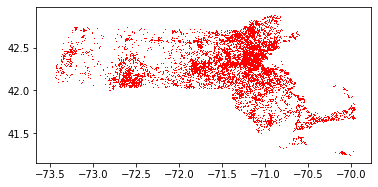

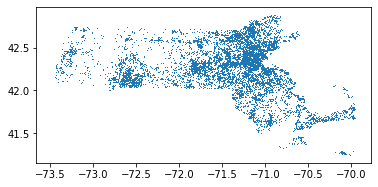

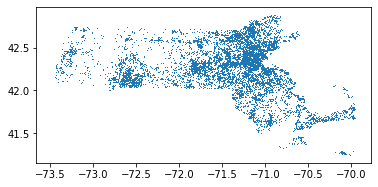

In [48]:
tiles_in_ma.plot(color='r')
tiles_in_ma_cities.plot()
check.plot()

In [30]:
tiles_in_ma_counties.columns
print()

Index(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'geometry', 'index_right', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID',
       'NAME', 'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP',
       'METDIVFP', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON'],
      dtype='object')

In [34]:
ma_data_q1_2020 = tiles_in_ma_counties.filter(items = ['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'geometry', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAMELSAD'])

In [37]:
i = 1
tiles_in_ma_counties.to_csv(path_or_buf= f'./ookla2020q{i}ma.csv', 
                                columns = ['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'geometry', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAMELSAD'])
# ma_data_q1_2020.to_csv(path_or_buf= './ookla2020q1ma.csv')

In [2]:
from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point

In [13]:
#do all the same for q2 q3 q4

def quarter_start(year: int, q: int) -> datetime:
    if not 1 <= q <= 4:
        raise ValueError("Quarter must be within [1, 2, 3, 4]")

    month = [1, 4, 7, 10]
    return datetime(year, month[q - 1], 1)


def get_tile_url(service_type: str, year: int, q: int) -> str:
    dt = quarter_start(year, q)

    base_url = "https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance"
    url = f"{base_url}/type%3D{service_type}/year%3D{dt:%Y}/quarter%3D{q}/{dt:%Y-%m-%d}_performance_fixed_tiles.zip"
    return url

# county_url = "https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip" 
# counties = gp.read_file(county_url)
# ma_counties = counties.loc[counties['STATEFP'] == '25'].to_crs(epsg=4326)
# ma_cities = gp.read_file('./data/export-gisdata.mapc.ma_municipalities').to_crs(epsg=4326)
# tile_url = get_tile_url(service_type, year, q)
# tiles = gp.read_file(tile_url)

# def get_data_to_csv(service_type: str, year: int, q: int):
#     #read data
#     print(f'start processing quarter{q}')
#     tile_url = get_tile_url(service_type, year, q)
#     tiles = gp.read_file(tile_url)
#     tiles.crs = {'init': 'epsg:4326', 'no_defs': True}
    
#     #get data for MA
#     print('start find data for MA')
#     tiles_in_ma_counties = gp.sjoin(tiles, ma_counties, how="inner", op='intersects')
    
#     #convert to csv
#     print('converting')
#     tiles_in_ma_counties.to_csv(path_or_buf= f'./ookla2020q{q}ma.csv', 
#                                 columns = ['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
#        'geometry', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAMELSAD'])
#     return None

def get_data_to_csv(service_type: str, year: int, q: int):
    #read data
    print(f'start processing quarter{q}')
    tile_url = get_tile_url(service_type, year, q)
    tiles = gp.read_file(tile_url)
    tiles.crs = {'init': 'epsg:4326', 'no_defs': True}
    
    #get data for MA
    print('start find data for MA')
    tiles_in_ma_cities = gp.sjoin(tiles, ma_cities, how="inner", op='intersects')
    
    #convert to csv
    print('converting')
    tiles_in_ma_cities.to_csv(path_or_buf= f'./ookla2020q{q}ma_bycity.csv')
    return None

def get_data_to_shp(service_type: str, year: int, q: int):
    #read data
    print(f'start processing quarter{q}')
    tile_url = get_tile_url(service_type, year, q)
    tiles = gp.read_file(tile_url)
    
    #get data for MA
    print('start find data for MA')
    tiles_in_ma_cities = gp.sjoin(tiles, ma_cities, how="inner", op='intersects')
    
    #convert to csv
    print('converting')
    tiles_in_ma_cities.to_file(filename= f'./ookla2020q{q}ma_bycity.shp')
    return None

In [10]:
ma_cities = gp.read_file('./data/export-gisdata.mapc.ma_municipalities').to_crs(epsg=4326)
ma_cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
tile_url = get_tile_url("fixed", 2020, 1)
tiles = gp.read_file(tile_url)
tiles.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
ma_cities = gp.read_file('./data/export-gisdata.mapc.ma_municipalities').to_crs(epsg=4326)
for q in range(1,5):
    get_data_to_shp("fixed", 2020, q)

start processing quarter1
start find data for MA
converting
start processing quarter2
start find data for MA
converting
start processing quarter3
start find data for MA
converting
start processing quarter4
start find data for MA
converting
